# Data Analysis on Pyweather
----
## Conclusion


Data analysis was performed on weather data and latitude of 600 random cities.
Collected Data can be seen at [City Data](Data/Weather_data_600_cities.csv)


### Trend 1:

![Temp](Images/latitude_temp.png)

By comparing Latitude and max temperature of 600 cities on Feb 22nd, it is clear that cities in southern atmosphere are much warmer.
Northern atmosphere is much colder as expected. None of the southern atmosphere cities reach 100 degree F. This means its not that hot over there. Southern atmosphere cities are probably good destination for vacation, but we need more data is needed to make sure.

### Trend 2:

![Cloud](Images/latitude_clouds.png)

There are no pattern in cloudiness and data is scattered all over the place.

### Trend 3:

![Wind](Images/latitude_wind_speed.png)

There are some cities in Northern atmosphere which have comparatively high wind speed of 25, but no city reaches above 50 on February 22nd 2018.


----
## Tasks completed:

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.


---
## changelog
* 22-Feb-2018 


In [41]:
#Note
# For temperature this program uses temp_max as it makes more sense. This can be easily replaced by temp if needed.
# following was performed for citipy package installation
#install citipy
#!pip install citipy

In [42]:
#Loading required packages
from citipy import citipy
import random as r
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
import datetime 
#import logging ### enable this if need to debug
import all_my_keys


In [43]:
#testing and seeing the structure
APIKEY_string ='&APPID='+ all_my_keys.openweathermap_api_key + ''
unit_string = '&units=Imperial'
city='London'
country = 'uk'
url= 'http://api.openweathermap.org/data/2.5/weather?q='+city+','+country+''+APIKEY_string+unit_string
print(url)
print(req.get(url))
x =req.get(url).json()
x


http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=ab3633d47a5629dc1896d56bfc229113&units=Imperial
<Response [200]>


{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1519356000,
 'id': 2643743,
 'main': {'humidity': 80,
  'pressure': 1022,
  'temp': 28.31,
  'temp_max': 33.8,
  'temp_min': 24.8},
 'name': 'London',
 'sys': {'country': 'GB',
  'id': 5091,
  'message': 0.0046,
  'sunrise': 1519369094,
  'sunset': 1519407017,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
   'icon': '04n',
   'id': 804,
   'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 6.93}}

In [44]:
# Fething data for city from openweathermap api. 
# One loop is used intentionally as it is faster than multiple loops.

#logging.basicConfig(level=logging.DEBUG)  ### enable this if need to debug
##################################################################
v_key = all_my_keys.openweathermap_api_key
v_key_log_mask ='xxxxxxxxxxxxxxxxxxx'  # masking key for security
v_unit = 'Imperial'
base_url= 'http://api.openweathermap.org/data/2.5/weather?q=%s,%s&APPID=%s&units=%s'
##################################################################
v_possible_list = [ x for x in range(-90,90,1)]
df_weather_data =  pd.DataFrame()
max_loop = 3000
number_of_data_points = 600
for x in range (1,max_loop,1):
    if len(df_weather_data) < number_of_data_points:
        try:
            v_lat = r.choice(v_possible_list)
            v_lon = r.choice(v_possible_list)
            city = citipy.nearest_city(v_lat, v_lon)
            v_city= city.city_name
            v_country= city.country_code
            url= base_url % (v_city,v_country,v_key,v_unit)
            url_to_log= base_url % (v_city,v_country,v_key_log_mask,v_unit)           
            print('Processing record (Fetch '+str(x)+' ) for country = ' + v_country +', city = ' + v_city  )
            print(url_to_log)
            weather_data =req.get(url).json()
            v_temp = weather_data['main']['temp_max']
            v_humidity = weather_data['main']['humidity']
            v_city_id= weather_data['sys']['id']
            v_wind_speed = weather_data['wind']['speed']
            v_clouds = weather_data['clouds']['all']
            print('city_id = ' + str(v_city_id)  )
            #populating list
            d_new = {'country' : v_country,
                  'city' : v_city, 
                  'latitude' : v_lat, 
                  'longitude' : v_lon ,   
                  'temp' : v_temp,
                  'humidity' : v_humidity, 
                  'city_id' : v_city_id, 
                  'wind_speed' : v_wind_speed ,
                  'clouds' : v_clouds
                 }
            df_new = pd.DataFrame([d_new])
            df_weather_data = pd.concat([df_weather_data, df_new]).drop_duplicates()
        except KeyboardInterrupt:
            print("Interrupted by User.")
            break
        except:
            print("Missing field -skipping.")
            pass
    else:
        break

if len(df_weather_data) < number_of_data_points:
    print('ERROR: Datapoints are still less than requirements')


Processing record (Fetch 1 ) for country = pt, city = lagoa
http://api.openweathermap.org/data/2.5/weather?q=lagoa,pt&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 5948
Processing record (Fetch 2 ) for country = ru, city = novyy urengoy
http://api.openweathermap.org/data/2.5/weather?q=novyy urengoy,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 3 ) for country = ru, city = inta
http://api.openweathermap.org/data/2.5/weather?q=inta,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 4 ) for country = sc, city = victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6865
Processing record (Fetch 5 ) for country = pt, city = ribeira grande
http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 6 ) for country = kz, city = shubarku

Missing field -skipping.
Processing record (Fetch 46 ) for country = za, city = saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6575
Processing record (Fetch 47 ) for country = so, city = bereda
http://api.openweathermap.org/data/2.5/weather?q=bereda,so&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 48 ) for country = br, city = cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 49 ) for country = ru, city = yar-sale
http://api.openweathermap.org/data/2.5/weather?q=yar-sale,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 50 ) for country = mg, city = taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 51 ) fo

Missing field -skipping.
Processing record (Fetch 90 ) for country = no, city = karasjok
http://api.openweathermap.org/data/2.5/weather?q=karasjok,no&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 5310
Processing record (Fetch 91 ) for country = br, city = boca do acre
http://api.openweathermap.org/data/2.5/weather?q=boca do acre,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 92 ) for country = ca, city = saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin,ca&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 3831
Processing record (Fetch 93 ) for country = ru, city = amderma
http://api.openweathermap.org/data/2.5/weather?q=amderma,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 94 ) for country = br, city = vila velha
http://api.openweathermap.org/data/2.5/weather?q=vila velha,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4498
Processing record (Fetch 95 

Missing field -skipping.
Processing record (Fetch 133 ) for country = bm, city = hamilton
http://api.openweathermap.org/data/2.5/weather?q=hamilton,bm&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4169
Processing record (Fetch 134 ) for country = sh, city = jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 135 ) for country = mu, city = bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6729
Processing record (Fetch 136 ) for country = gh, city = cape coast
http://api.openweathermap.org/data/2.5/weather?q=cape coast,gh&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 137 ) for country = cn, city = korla
http://api.openweathermap.org/data/2.5/weather?q=korla,cn&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fe

Missing field -skipping.
Processing record (Fetch 177 ) for country = sh, city = jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 178 ) for country = ru, city = belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 179 ) for country = za, city = cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6529
Processing record (Fetch 180 ) for country = cd, city = kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?q=kasongo-lunda,cd&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 181 ) for country = us, city = scottsboro
http://api.openweathermap.org/data/2.5/weather?q=scottsboro,us&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 238
Processi

Missing field -skipping.
Processing record (Fetch 221 ) for country = ci, city = grand-lahou
http://api.openweathermap.org/data/2.5/weather?q=grand-lahou,ci&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 222 ) for country = za, city = hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 223 ) for country = ci, city = daoukro
http://api.openweathermap.org/data/2.5/weather?q=daoukro,ci&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 224 ) for country = cl, city = coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo,cl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4666
Processing record (Fetch 225 ) for country = ar, city = tucuman
http://api.openweathermap.org/data/2.5/weather?q=tucuman,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetc

city_id = 5948
Processing record (Fetch 265 ) for country = na, city = gobabis
http://api.openweathermap.org/data/2.5/weather?q=gobabis,na&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6913
Processing record (Fetch 266 ) for country = ru, city = kaspiyskiy
http://api.openweathermap.org/data/2.5/weather?q=kaspiyskiy,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 267 ) for country = mu, city = souillac
http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6729
Processing record (Fetch 268 ) for country = za, city = hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 269 ) for country = mg, city = taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 270 ) for countr

Missing field -skipping.
Processing record (Fetch 309 ) for country = za, city = port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 310 ) for country = cv, city = ponta do sol
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol,cv&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 311 ) for country = bs, city = andros town
http://api.openweathermap.org/data/2.5/weather?q=andros town,bs&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4081
Processing record (Fetch 312 ) for country = ru, city = kanevskaya
http://api.openweathermap.org/data/2.5/weather?q=kanevskaya,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 313 ) for country = sd, city = waw
http://api.openweathermap.org/data/2.5/weather?q=waw,sd&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing 

Missing field -skipping.
Processing record (Fetch 353 ) for country = cv, city = ponta do sol
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol,cv&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 354 ) for country = ru, city = starosubkhangulovo
http://api.openweathermap.org/data/2.5/weather?q=starosubkhangulovo,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 355 ) for country = za, city = hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 356 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 357 ) for country = br, city = cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.

Missing field -skipping.
Processing record (Fetch 397 ) for country = za, city = cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6529
Processing record (Fetch 398 ) for country = es, city = santa cruz de tenerife
http://api.openweathermap.org/data/2.5/weather?q=santa cruz de tenerife,es&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 5519
Processing record (Fetch 399 ) for country = au, city = carnarvon
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 400 ) for country = za, city = port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 401 ) for country = za, city = warmbad
http://api.openweathermap.org/data/2.5/weather?q=warmbad,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.

Missing field -skipping.
Processing record (Fetch 441 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 442 ) for country = pe, city = talara
http://api.openweathermap.org/data/2.5/weather?q=talara,pe&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 443 ) for country = za, city = port elizabeth
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6596
Processing record (Fetch 444 ) for country = sh, city = jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 445 ) for country = br, city = cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 44

Missing field -skipping.
Processing record (Fetch 485 ) for country = tz, city = kilindoni
http://api.openweathermap.org/data/2.5/weather?q=kilindoni,tz&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 486 ) for country = pt, city = ribeira grande
http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 487 ) for country = pt, city = ribeira grande
http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 488 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 489 ) for country = so, city = bargal
http://api.openweathermap.org/data/2.5/weather?q=bargal,so&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Proce

Processing record (Fetch 528 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 529 ) for country = za, city = cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6529
Processing record (Fetch 530 ) for country = in, city = pathardi
http://api.openweathermap.org/data/2.5/weather?q=pathardi,in&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 531 ) for country = fr, city = plouzane
http://api.openweathermap.org/data/2.5/weather?q=plouzane,fr&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 5628
Processing record (Fetch 532 ) for country = mu, city = grand river south east
http://api.openweathermap.org/data/2.5/weather?q=grand river south east,mu&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 533 ) for country

Missing field -skipping.
Processing record (Fetch 573 ) for country = cl, city = valparaiso
http://api.openweathermap.org/data/2.5/weather?q=valparaiso,cl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4676
Processing record (Fetch 574 ) for country = ru, city = shchelyayur
http://api.openweathermap.org/data/2.5/weather?q=shchelyayur,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 575 ) for country = br, city = ilhabela
http://api.openweathermap.org/data/2.5/weather?q=ilhabela,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 576 ) for country = ar, city = tres arroyos
http://api.openweathermap.org/data/2.5/weather?q=tres arroyos,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 577 ) for country = za, city = plettenberg bay
http://api.openweathermap.org/data/2.5/weather?q=plettenberg bay,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -ski

city_id = 5290
Processing record (Fetch 617 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 618 ) for country = mg, city = beloha
http://api.openweathermap.org/data/2.5/weather?q=beloha,mg&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 619 ) for country = mr, city = atar
http://api.openweathermap.org/data/2.5/weather?q=atar,mr&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 620 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 621 ) for country = br, city = touros
http://api.openweathermap.org/data/2.5/weather?q=touros,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 622 ) for country = cv, city = ponta do 

Missing field -skipping.
Processing record (Fetch 661 ) for country = co, city = san andres
http://api.openweathermap.org/data/2.5/weather?q=san andres,co&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 662 ) for country = ru, city = belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 663 ) for country = ru, city = belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 664 ) for country = za, city = bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6591
Processing record (Fetch 665 ) for country = za, city = kruisfontein
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field 

Missing field -skipping.
Processing record (Fetch 704 ) for country = ma, city = nador
http://api.openweathermap.org/data/2.5/weather?q=nador,ma&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 5520
Processing record (Fetch 705 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 706 ) for country = kz, city = zhezkazgan
http://api.openweathermap.org/data/2.5/weather?q=zhezkazgan,kz&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 7201
Processing record (Fetch 707 ) for country = no, city = tynset
http://api.openweathermap.org/data/2.5/weather?q=tynset,no&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 5323
Processing record (Fetch 708 ) for country = gl, city = upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 709 ) for country = za, city = herma

Missing field -skipping.
Processing record (Fetch 747 ) for country = na, city = henties bay
http://api.openweathermap.org/data/2.5/weather?q=henties bay,na&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 748 ) for country = us, city = state college
http://api.openweathermap.org/data/2.5/weather?q=state college,us&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 2372
Processing record (Fetch 749 ) for country = za, city = saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6575
Processing record (Fetch 750 ) for country = za, city = hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 751 ) for country = gl, city = ilulissat
http://api.openweathermap.org/data/2.5/weather?q=ilulissat,gl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4805
Processing record (Fetch 75

city_id = 6591
Processing record (Fetch 791 ) for country = mx, city = tulum
http://api.openweathermap.org/data/2.5/weather?q=tulum,mx&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 3978
Processing record (Fetch 792 ) for country = mu, city = bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6729
Processing record (Fetch 793 ) for country = re, city = saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6792
Processing record (Fetch 794 ) for country = mg, city = beloha
http://api.openweathermap.org/data/2.5/weather?q=beloha,mg&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 795 ) for country = br, city = rio grande
http://api.openweathermap.org/data/2.5/weather?q=rio grande,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 796 ) for 

city_id = 4138
Processing record (Fetch 835 ) for country = us, city = mount pleasant
http://api.openweathermap.org/data/2.5/weather?q=mount pleasant,us&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 2428
Processing record (Fetch 836 ) for country = br, city = cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 837 ) for country = it, city = crotone
http://api.openweathermap.org/data/2.5/weather?q=crotone,it&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 838 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 839 ) for country = gl, city = upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 840 ) for 

Processing record (Fetch 878 ) for country = au, city = busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 879 ) for country = sh, city = jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 880 ) for country = td, city = faya
http://api.openweathermap.org/data/2.5/weather?q=faya,td&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 881 ) for country = ru, city = sukhobezvodnoye
http://api.openweathermap.org/data/2.5/weather?q=sukhobezvodnoye,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 882 ) for country = ca, city = saint anthony
http://api.openweathermap.org/data/2.5/weather?q=saint anthony,ca&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (F

Missing field -skipping.
Processing record (Fetch 922 ) for country = au, city = busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 923 ) for country = na, city = walvis bay
http://api.openweathermap.org/data/2.5/weather?q=walvis bay,na&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6925
Processing record (Fetch 924 ) for country = ga, city = port-gentil
http://api.openweathermap.org/data/2.5/weather?q=port-gentil,ga&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 925 ) for country = bb, city = bathsheba
http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4160
Processing record (Fetch 926 ) for country = ca, city = attawapiskat
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat,ca&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing re

Missing field -skipping.
Processing record (Fetch 966 ) for country = cl, city = lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 967 ) for country = br, city = pocone
http://api.openweathermap.org/data/2.5/weather?q=pocone,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 968 ) for country = no, city = sorland
http://api.openweathermap.org/data/2.5/weather?q=sorland,no&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 5306
Processing record (Fetch 969 ) for country = gl, city = illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 970 ) for country = ag, city = codrington
http://api.openweathermap.org/data/2.5/weather?q=codrington,ag&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (

Missing field -skipping.
Processing record (Fetch 1010 ) for country = br, city = laguna
http://api.openweathermap.org/data/2.5/weather?q=laguna,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1011 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 1012 ) for country = sc, city = victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6865
Processing record (Fetch 1013 ) for country = ca, city = pangnirtung
http://api.openweathermap.org/data/2.5/weather?q=pangnirtung,ca&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1014 ) for country = za, city = bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6591
Processing record (Fetch 1015 ) for 

Missing field -skipping.
Processing record (Fetch 1055 ) for country = mu, city = mahebourg
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6729
Processing record (Fetch 1056 ) for country = kz, city = dzhusaly
http://api.openweathermap.org/data/2.5/weather?q=dzhusaly,kz&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1057 ) for country = cv, city = praia
http://api.openweathermap.org/data/2.5/weather?q=praia,cv&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6188
Processing record (Fetch 1058 ) for country = ru, city = tumannyy
http://api.openweathermap.org/data/2.5/weather?q=tumannyy,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1059 ) for country = za, city = bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6591
Processing record (Fetch 1060 ) for coun

city_id = 4405
Processing record (Fetch 1098 ) for country = gl, city = upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1099 ) for country = gl, city = qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1100 ) for country = mu, city = mahebourg
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6729
Processing record (Fetch 1101 ) for country = co, city = orocue
http://api.openweathermap.org/data/2.5/weather?q=orocue,co&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1102 ) for country = na, city = luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz,na&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6917
Processing record (Fetch 1103 ) for countr

Missing field -skipping.
Processing record (Fetch 1141 ) for country = ni, city = san rafael del sur
http://api.openweathermap.org/data/2.5/weather?q=san rafael del sur,ni&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4209
Processing record (Fetch 1142 ) for country = ly, city = jalu
http://api.openweathermap.org/data/2.5/weather?q=jalu,ly&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1143 ) for country = mz, city = quelimane
http://api.openweathermap.org/data/2.5/weather?q=quelimane,mz&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6858
Processing record (Fetch 1144 ) for country = re, city = saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6792
Processing record (Fetch 1145 ) for country = ru, city = belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Proc

Missing field -skipping.
Processing record (Fetch 1184 ) for country = ao, city = chissamba
http://api.openweathermap.org/data/2.5/weather?q=chissamba,ao&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1185 ) for country = bg, city = bjala
http://api.openweathermap.org/data/2.5/weather?q=bjala,bg&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1186 ) for country = mv, city = thinadhoo
http://api.openweathermap.org/data/2.5/weather?q=thinadhoo,mv&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1187 ) for country = br, city = caravelas
http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1188 ) for country = ru, city = sovetskaya
http://api.openweathermap.org/data/2.5/weather?q=sovetskaya,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Proces

city_id = 4160
Processing record (Fetch 1228 ) for country = co, city = guamo
http://api.openweathermap.org/data/2.5/weather?q=guamo,co&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1229 ) for country = pe, city = talara
http://api.openweathermap.org/data/2.5/weather?q=talara,pe&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1230 ) for country = no, city = honningsvag
http://api.openweathermap.org/data/2.5/weather?q=honningsvag,no&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 5300
Processing record (Fetch 1231 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 1232 ) for country = mu, city = grand river south east
http://api.openweathermap.org/data/2.5/weather?q=grand river south east,mu&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record 

Missing field -skipping.
Processing record (Fetch 1271 ) for country = za, city = cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6529
Processing record (Fetch 1272 ) for country = ua, city = oleksandrivka
http://api.openweathermap.org/data/2.5/weather?q=oleksandrivka,ua&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1273 ) for country = ca, city = thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 3406
Processing record (Fetch 1274 ) for country = ec, city = san cristobal
http://api.openweathermap.org/data/2.5/weather?q=san cristobal,ec&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1275 ) for country = za, city = oudtshoorn
http://api.openweathermap.org/data/2.5/weather?q=oudtshoorn,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6549
Processing rec

Missing field -skipping.
Processing record (Fetch 1314 ) for country = za, city = east london
http://api.openweathermap.org/data/2.5/weather?q=east london,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6538
Processing record (Fetch 1315 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 1316 ) for country = za, city = cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6529
Processing record (Fetch 1317 ) for country = br, city = ilhabela
http://api.openweathermap.org/data/2.5/weather?q=ilhabela,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1318 ) for country = mu, city = mahebourg
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6729
Processing record (Fetch 1319 ) for countr

city_id = 6190
Processing record (Fetch 1357 ) for country = ar, city = olavarria
http://api.openweathermap.org/data/2.5/weather?q=olavarria,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1358 ) for country = ae, city = abu dhabi
http://api.openweathermap.org/data/2.5/weather?q=abu dhabi,ae&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 7097
Processing record (Fetch 1359 ) for country = ru, city = novolabinskaya
http://api.openweathermap.org/data/2.5/weather?q=novolabinskaya,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 7295
Processing record (Fetch 1360 ) for country = br, city = aquiraz
http://api.openweathermap.org/data/2.5/weather?q=aquiraz,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4498
Processing record (Fetch 1361 ) for country = cl, city = castro
http://api.openweathermap.org/data/2.5/weather?q=castro,cl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1362 ) for coun

Missing field -skipping.
Processing record (Fetch 1402 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 1403 ) for country = ao, city = luena
http://api.openweathermap.org/data/2.5/weather?q=luena,ao&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1404 ) for country = za, city = port elizabeth
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6596
Processing record (Fetch 1405 ) for country = mg, city = taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1406 ) for country = za, city = port elizabeth
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6596
Processing record (Fet

city_id = 4642
Processing record (Fetch 1446 ) for country = mz, city = beira
http://api.openweathermap.org/data/2.5/weather?q=beira,mz&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6845
Processing record (Fetch 1447 ) for country = gl, city = paamiut
http://api.openweathermap.org/data/2.5/weather?q=paamiut,gl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1448 ) for country = mv, city = hithadhoo
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1449 ) for country = mv, city = kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?q=kudahuvadhoo,mv&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1450 ) for country = ru, city = belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record 

city_id = 6787
Processing record (Fetch 1490 ) for country = za, city = margate
http://api.openweathermap.org/data/2.5/weather?q=margate,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1491 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 1492 ) for country = br, city = aracati
http://api.openweathermap.org/data/2.5/weather?q=aracati,br&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1493 ) for country = ro, city = cilibia
http://api.openweathermap.org/data/2.5/weather?q=cilibia,ro&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1494 ) for country = us, city = wilmington
http://api.openweathermap.org/data/2.5/weather?q=wilmington,us&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 636
Processing record (Fetch 1495 ) for country =

Missing field -skipping.
Processing record (Fetch 1533 ) for country = in, city = port blair
http://api.openweathermap.org/data/2.5/weather?q=port blair,in&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1534 ) for country = cv, city = ponta do sol
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol,cv&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1535 ) for country = so, city = bargal
http://api.openweathermap.org/data/2.5/weather?q=bargal,so&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1536 ) for country = ar, city = ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4754
Processing record (Fetch 1537 ) for country = re, city = saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6792
Processing r

Missing field -skipping.
Processing record (Fetch 1576 ) for country = za, city = east london
http://api.openweathermap.org/data/2.5/weather?q=east london,za&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 6538
Processing record (Fetch 1577 ) for country = gl, city = upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1578 ) for country = ru, city = usinsk
http://api.openweathermap.org/data/2.5/weather?q=usinsk,ru&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
Missing field -skipping.
Processing record (Fetch 1579 ) for country = gf, city = cayenne
http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&APPID=xxxxxxxxxxxxxxxxxxx&units=Imperial
city_id = 4338


In [45]:
# Checking data
df_weather_data.head(10)

,city,city_id,clouds,country,humidity,latitude,longitude,temp,wind_speed
0,lagoa,5948,0,pt,49,48,-29,48.20,8.05
0,victoria,6865,20,sc,74,-5,63,84.20,2.24
0,bambous virieux,6729,40,mu,88,-27,75,78.80,8.05
0,bredasdorp,6591,48,za,77,-61,25,69.80,17.22
0,saldanha,6575,20,za,88,-38,-2,66.20,3.36
0,cape town,6529,75,za,88,-65,-9,66.20,8.05
0,saint-philippe,6792,0,re,61,-56,72,84.20,4.70
0,pisco,4405,0,pe,83,-23,-90,71.60,11.41
0,spartanburg,1824,1,us,82,35,-82,64.40,5.41
0,ilulissat,4805,32,gl,69,80,-45,-9.41,11.41


In [46]:
#Saving the data into file.
df_weather_data.to_csv("Weather_data_600_cities.csv", index=False, header=True)

In [52]:
#scatter graph function for easier call and non-repetition of code

def my_scatter_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series, ytick_range ):
    now = datetime.datetime.now()
    v_current_date = ' ('+now.strftime("%m/%d/%y")+')'
    v_title = v_title + str(v_current_date)
    fig, ax1 = plt.subplots(figsize=(10, 6))
    df_scatter = df_weather_data[:]
    x1, = df_scatter.plot(kind="scatter"
                          , x=v_x_axis_series
                          , y=v_y_axis_series
                          ,title = v_title
                          , grid=True
                          , edgecolors="black"
                          ,subplots=True
                          ,marker ='o'
                          ,s = 70
                          , ax=ax1 
                           )

    ax1.set_xlabel(v_x_label)
    ax1.set_ylabel(v_y_label)
    ax1.set_facecolor('#f0f0f5')
    ax1.set_axisbelow(True)
    ax1.grid(color='white', linewidth=2)
    ax1.set_xticks(range(-100,100+1 , 20))
    #ax1.set_yticks(range(-20,120+1 , 20))
    ax1.set_yticks(ytick_range)
    #plt.savefig(str.replace(v_title+".png",' ',''))
    plt.savefig(v_x_axis_series+'_'+v_y_axis_series+".png")
    plt.show()



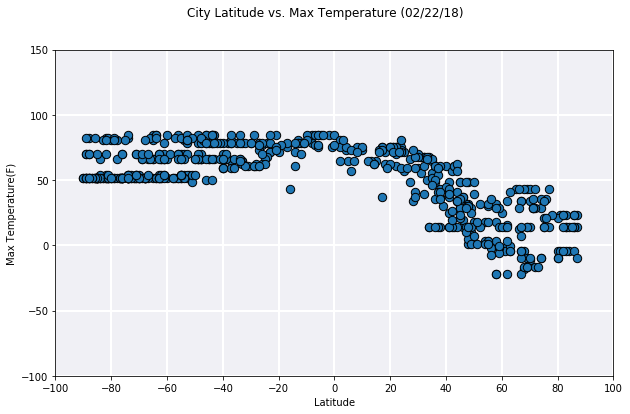

In [53]:
#creating plot City Latitude vs. Max Temperature
v_title ="City Latitude vs. Max Temperature"
v_x_label ="Latitude"
v_y_label ="Max Temperature(F)"
v_x_axis_series ="latitude"
v_y_axis_series  ="temp"
ytick_range = range(-100,150+1 , 50)
my_scatter_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series,ytick_range )

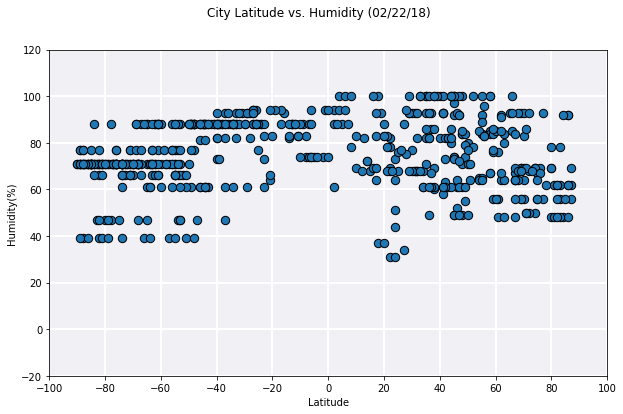

In [54]:
#creating plot City Latitude vs. Humidity


v_title ="City Latitude vs. Humidity" 
v_x_label ="Latitude"
v_y_label ="Humidity(%)"
v_x_axis_series ="latitude"
v_y_axis_series  ="humidity"
ytick_range = range(-20,120+1 , 20)
my_scatter_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series,ytick_range )

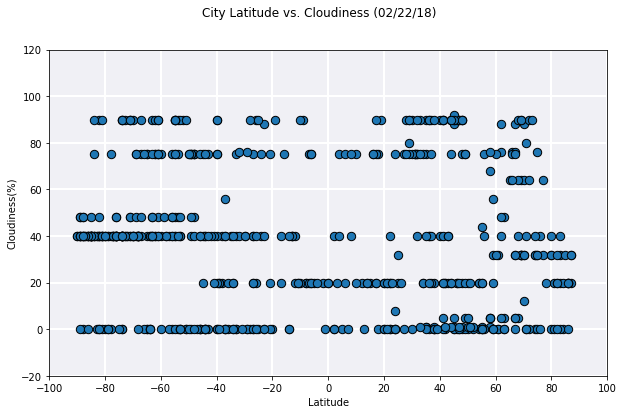

In [55]:
#creating plot City Latitude vs. Cloudiness
v_title ="City Latitude vs. Cloudiness"
v_x_label ="Latitude"
v_y_label ="Cloudiness(%)"
v_x_axis_series ="latitude"
v_y_axis_series  ="clouds"
ytick_range = range(-20,120+1 , 20)
my_scatter_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series,ytick_range )

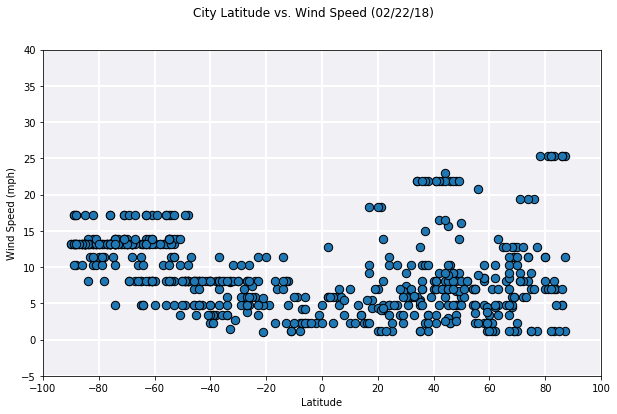

In [56]:
#creating plot City Latitude vs. Wind Speed
v_title ="City Latitude vs. Wind Speed"
v_x_label ="Latitude"
v_y_label ="Wind Speed (mph)"
v_x_axis_series ="latitude"
v_y_axis_series  ="wind_speed"
ytick_range = range(-5,40+1 , 5)
my_scatter_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series,ytick_range )